In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import os
import pandas as pd
import math
%matplotlib inline

# Load data from filesystem
df = pd.read_csv('/kaggle/input/survey_results_public.csv', delimiter=',', nrows = None)
df.dataframeName = 'survey_results_public.csv'

pandasVersion = pd.__version__
print(f'Pandas version is {pandasVersion}')      

Pandas version is 0.25.3


In [15]:
# Some classes we will be using for convenience and to keep the code shorter.

class DataFrameHelper:
    ''' Keeps a copy of the origin (unless filter is applied) so we can always use as many rows as possible. Has often used helper methods. '''
    def __init__(self, dataframe):
        ''' Constructor.
        Args:
            dataframe: The dataframe to operate on
        '''
        self.dataframe = dataframe

    def printShape(self):
        ''' Print the shape of the dataframe '''
        nRow, nCol = self.dataframe.shape
        print(f'Shape: there are {nRow} rows and {nCol} columns in the dataframe.')

    def printMissingValuesSum(self, columnNames):
        ''' Prints the missing value of the passed columns 
        Args:
            columnNames: Names of the columgs to print the sum of missing values of
        '''
        for columnName in columnNames:
            print("{} has {} missing values.".format(columnName, self.dataframe[columnName].isnull().sum()))

    def applyFilter(self, columnNames):
        ''' Alters the contained dataframe by keeping only the passed columns 
        Args:
            columnNames: Names of the columns to apply the filter to
        '''
        self.dataframe = self.dataframe.filter(columnNames)
        return self
    
    def dropNa(self, columnNames):
        ''' Remove NaN values from the passed columns and return a fresh dataframe 
        Args:
            columnNames: Names of the columns to drop NaN values of
        '''
        return self.dataframe.dropna(subset = columnNames)  
    
    def dropZero(self, columnName):
        ''' Remove zero (0) values from the passed columns and return a fresh dataframe 
        Args:
            columnName: Name of the column to drop zero values of
        '''        
        return self.dataframe[self.dataframe[columnName] != 0]
    
    def stackAggregatedValues(self, columnName, separator = ";"):
        '''Count the values of the given column.      
        Used when column values are aggregated (contain multiple values which are delimited)     
        Args:
            columnName (str): Name of the column to split and count the values of.
            delimiter (str, optional): The delimiter to splie by. Defaults to ';'.            
        Returns:
            A dataframe with the value counts.            
        '''        
        # Split each row's values by the delimiter into new columns, then stack these into rows and count the values.
        # strip() is used because f.i. data can have the values "Take online courses" and " Take online courses".      
        return self.dataframe[columnName].str.split(';', expand = True).stack().str.strip()
       
class PlotHelper:
    ''' Plot helper has some predefined values for quicker and easier plotting '''
    def __init__(self, dataframe):
        ''' Constructor.
        Args:
            dataframe: Used to calculate the total number of items
            xAxisLabelValue: Label of the x axis
            yAxisLabelValue: Label of the y axis
            yAxisFactorValue: Scale the y axis, useful if there are percentages            
            yAxisFormatterValue: The y axis formatter to use            
            showGridValue: Whether to show the grid
            numberOfItemsValue: Limit the number of items to plot
            kindValue: What kind of plot to display
        '''
        self.dataframe = dataframe
        self.xAxisLabelValue = ""        
        self.yAxisLabelValue = "" 
        self.yAxisFactorValue = 1  
        self.yAxisFormatterValue = mtick.PercentFormatter()        
        self.showGridValue = True
        self.numberOfItemsValue = 0
        self.kindValue = "bar"

    def xAxisLabel(self, xAxisLabel):
        ''' Set the label of the x axis 
        Args:
            xAxisLabelValue: Label of the x axis
        '''
        self.xAxisLabelValue = xAxisLabel
        return self
        
    def yAxisLabel(self, yAxisLabel):
        ''' Set the label of the y axis 
        Args:
            yAxisLabelValue: Label of the y axis                    
        '''        
        self.yAxisLabelValue = yAxisLabel
        return self
    
    def yAxisFactor(self, yAxisFactor):
        ''' Set the scaling of the y axis 
        Args:
            yAxisFactorValue: Scale the y axis, useful if there are percentages                         
        '''        
        self.yAxisFactorValue = yAxisFactor
        return self
    
    def yAxisFormatter(self, yAxisFormatter):
        ''' Set the y axis formatter 
        Args:
            yAxisFormatterValue: The y axis formatter to use                      
        '''        
        self.yAxisFormatterValue = yAxisFormatter
        return self    
    
    def showGridValue(self, showGridValue):
        ''' Whether to show the grid in the plot
        Args:
            showGridValue: Whether to show the grid                    
        '''        
        self.showGridValue = showGridValue
        return self      
    
    def top(self, numberOfItems):
        ''' Limit plot items 
        Args:
            numberOfItemsValue: Limit the number of items to plot                    
        '''        
        self.numberOfItemsValue = numberOfItems
        return self
        
    def kind(self, kind):
        ''' Set the kind of plot we want to show 
        Args:
            kindValue: What kind of plot to display                    
        '''
        self.kindValue = kind
        return self                     
        
    def showPlot(self, data, title = "Title"): 
        ''' Plot with the set instance values 
        Args:
            title: The plot's main title      
        '''
        if (self.numberOfItemsValue > 0):
            # Limit the number of items shown
            data = data.head(self.numberOfItemsValue)            
        # Calcluate the plot values
        resultingPlot = (data * self.yAxisFactorValue / self.dataframe.shape[0]).plot(kind = self.kindValue);
        # Set formatter, labels, grid, and title
        resultingPlot.yaxis.set_major_formatter(self.yAxisFormatterValue)        
        plt.xlabel(self.xAxisLabelValue)
        plt.ylabel(self.yAxisLabelValue)
        plt.grid(self.showGridValue)
        plt.title(title);
        # Show the plot
        plt.show()

In [16]:
# Some preliminary settings, like what columns are most relevant and how many of the top languages to look at, create initial dataset            
relevantColumns = ["HaveWorkedLanguage", "WantWorkLanguage", "CareerSatisfaction", "JobSatisfaction", "JobSeekingStatus", "DeveloperType", "Salary"]
topLanguages = 15
origin = DataFrameHelper(df)

# Print some information on the original dataset
origin.printShape()
origin.printMissingValuesSum(relevantColumns)

# Only use the columns we're interested in
origin.applyFilter(relevantColumns)

origin.printShape()

Shape: there are 19102 rows and 154 columns in the dataframe.
HaveWorkedLanguage has 5576 missing values.
WantWorkLanguage has 6579 missing values.
CareerSatisfaction has 3000 missing values.
JobSatisfaction has 3849 missing values.
JobSeekingStatus has 6250 missing values.
DeveloperType has 5330 missing values.
Salary has 14093 missing values.
Shape: there are 19102 rows and 7 columns in the dataframe.


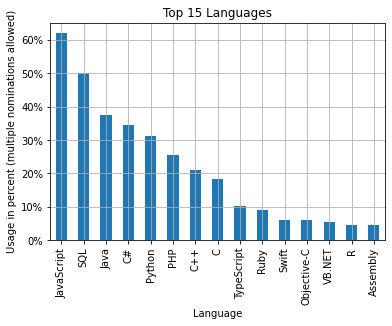

In [17]:
# Question 1: What languages are most represented?

# Drop the null values and use the resulting dataset.
hwl = DataFrameHelper(origin.dropNa(["HaveWorkedLanguage"]))

# Plot the results
PlotHelper(hwl.dataframe).top(topLanguages).yAxisFactor(100).xAxisLabel("Language").yAxisLabel("Usage in percent (multiple nominations allowed)") \
    .showPlot(hwl.stackAggregatedValues("HaveWorkedLanguage").value_counts(), f"Top {topLanguages} Languages")

In [18]:
# Question 2: Refine the languages by developer type.

# This is achieved in several passes:
#  1. For simplicity's sake, assume the first given role is the developer's primary role. Store this in the DeveloperType column.
#  2. Build a list of all possible developer types.
#  3. Build a list of all possible language types.
#  4. In a dictionary that has all developer types, keep a counted dictionary of each language per that developer type.

# As always clean the data. Also apply filter to make working with the dataset a bit easier.
lbt = DataFrameHelper(origin.dropNa(["HaveWorkedLanguage", "DeveloperType"])).applyFilter(["HaveWorkedLanguage", "DeveloperType"]).dataframe

# Only use the primary role.
for (index, roles) in lbt["DeveloperType"].iteritems():    
    lbt.at[index, "DeveloperType"] = roles.split(";")[0]

# Skip roles "Other" and "Graphic designer" (there are only three results for graphic designer, this is not representative)
lbt = lbt[lbt.DeveloperType != "Other"]    
lbt = lbt[lbt.DeveloperType != "Graphic designer"]

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

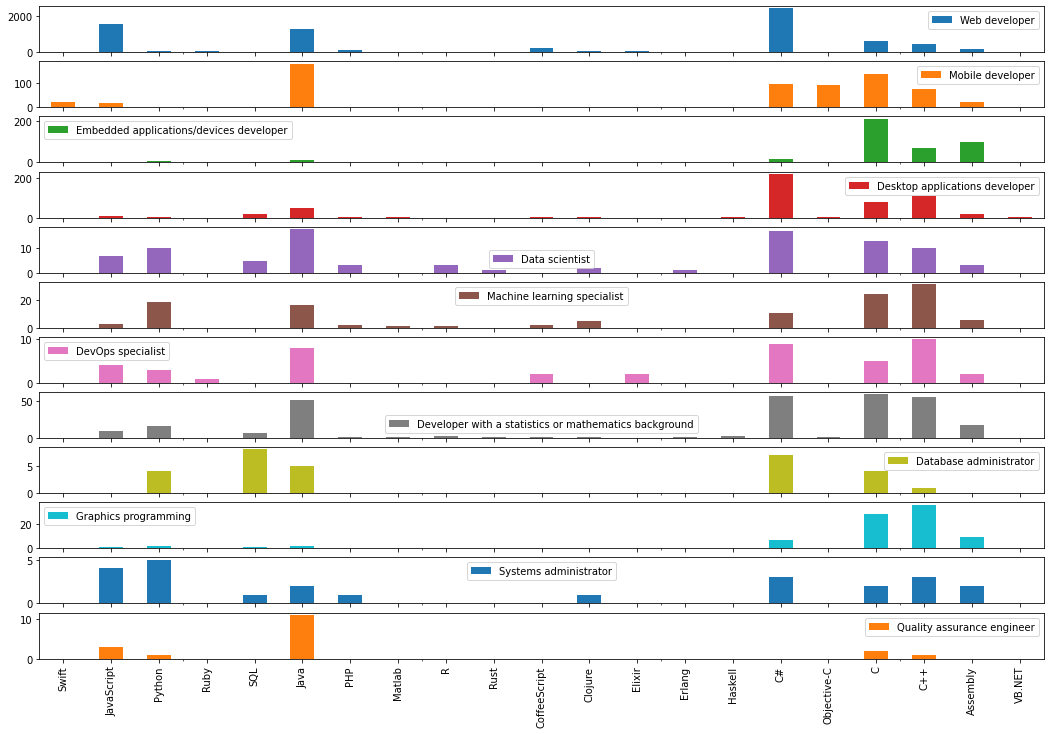

In [19]:
# Find all unique developer types and languages.
exsitingDeveloperTypes = pd.unique(lbt["DeveloperType"])
existingLanguages = pd.unique(DataFrameHelper(hwl.dataframe.head(topLanguages)).stackAggregatedValues("HaveWorkedLanguage"))

def createLanguageCounter(languages):
    # Build a dictionary of all possible languages and counts.
    languagesInUse = {}
    for language in languages:
        languagesInUse[language] = 0
    return languagesInUse

# Build a dictionary of all possible developer types and their respective language counts.
developerTypes = {}
for developerType in exsitingDeveloperTypes:
    developerTypes[developerType] = createLanguageCounter(existingLanguages)
    
# Perform the count (using list comprehension with lambda instead of iterrows)
def countByDeveloperType(d, l):
    for language in l.split(";"):
        if language in developerTypes[d]:
            developerTypes[d][language.strip()] += 1

[countByDeveloperType(d, l) for d, l in zip(lbt['DeveloperType'], lbt['HaveWorkedLanguage'])]

# Plot and do a bit of scaling.
# Unfortunately I found no better way to remove titles.
pd.DataFrame(developerTypes).plot(subplots = True, kind = 'bar', title = [''] * len(exsitingDeveloperTypes))
fig_size = plt.gcf().get_size_inches() 
sizefactor = 3 
plt.gcf().set_size_inches(sizefactor * fig_size);
plt.show()

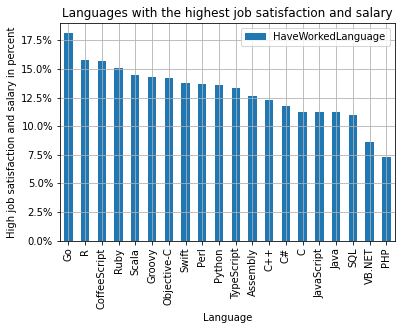

In [20]:
# Question 3: Now we are looking at the languages with the highest job satisfaction and salaries at the same time.
# For highest job satisfaction and salaries we will be looking at all values above the mean.

# Prepare the data for selection.
salsat = DataFrameHelper(origin.dropNa(["HaveWorkedLanguage", "JobSatisfaction", "Salary"])).applyFilter(["HaveWorkedLanguage", "JobSatisfaction", "Salary"])

# Save language counts to later proportionalize the filtered value counts
salaryAndSatisfactionCountsBefore = salsat.stackAggregatedValues("HaveWorkedLanguage").value_counts()

# Determine the means.
salsat = salsat.dataframe
salaryMean = salsat["Salary"].mean()
jobSatisfactionMean = salsat["JobSatisfaction"].mean()
salsat["Salary"] = salsat["Salary"].astype("int64")

# Drop any records below the mean.
salsat.drop(salsat[salsat["Salary"] < salaryMean].index, inplace = True)
salsat.drop(salsat[salsat["JobSatisfaction"] < jobSatisfactionMean].index, inplace = True)

# Count the langueage values present in the dataset.
salaryAndSatisfactionCountsAfter = DataFrameHelper(salsat).stackAggregatedValues("HaveWorkedLanguage").value_counts()

# Create a new dataframe for easier working.
salaryAndSatisfactionChart = DataFrameHelper(pd.DataFrame.from_dict(salaryAndSatisfactionCountsAfter))

# Proportionalize the language counts, then for plotting, simplify again and sort.
salaryAndSatisfactionChart.dataframe["HaveWorkedLanguage"] = (salaryAndSatisfactionChart.dataframe.iloc[:,0] / salaryAndSatisfactionCountsBefore[salaryAndSatisfactionChart.dataframe.index]) * 100
salaryAndSatisfactionChart.applyFilter(["HaveWorkedLanguage"])
salaryAndSatisfactionChart = salaryAndSatisfactionChart.dataframe.head(topLanguages + 5)
salaryAndSatisfactionChart = salaryAndSatisfactionChart.sort_values(by = ['HaveWorkedLanguage'], ascending = False)

# Plot.
PlotHelper(salaryAndSatisfactionChart).yAxisFactor(10).xAxisLabel("Language").yAxisLabel("High job satisfaction and salary in percent") \
    .showPlot(salaryAndSatisfactionChart, f"Languages with the highest job satisfaction and salary")

In [21]:
# Question 4 examines what language developers that consider getting a new job are currently using.
jss = DataFrameHelper(origin.dropNa(["HaveWorkedLanguage", "JobSeekingStatus"])).applyFilter(["HaveWorkedLanguage", "JobSeekingStatus"]).dataframe

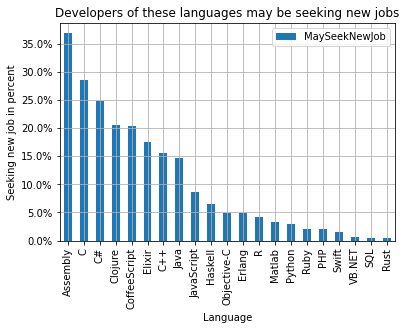

In [22]:
isNotSeekingJob = "no"
isSeekingJob = "yes"

# Filter by developers actively looking for a new job or who may be open to new opportunities.
jss["LookingForJob"] = np.where(jss["JobSeekingStatus"] != "I am not interested in new job opportunities", isSeekingJob, isNotSeekingJob)

# Get total number of jobs for those who answered the "JobSeekingStatus" question
seekingLanguageCounts = DataFrameHelper(jss).stackAggregatedValues("HaveWorkedLanguage").value_counts()

# Build a dictionary of whether developers are looking for a new job and their respective language counts.
jobSeekers = { isSeekingJob: createLanguageCounter(existingLanguages) }
    
def countByJobSeekers(s, l):
    if s == isSeekingJob:
        for language in l.split(";"):
            if language in jobSeekers[s]:
                jobSeekers[s][language.strip()] += 1    

[countByJobSeekers(s, l) for s, l in zip(jss['LookingForJob'], jss['HaveWorkedLanguage'])]

# Create a new dataframe for easier working. Proportionalize and prepare for plotting as we did in Question 3.
jobSeekersChart = DataFrameHelper(pd.DataFrame.from_dict(jobSeekers))
jobSeekersChart.dataframe["MaySeekNewJob"] = (jobSeekersChart.dataframe.iloc[:,0] / seekingLanguageCounts[jobSeekersChart.dataframe.index]) * 100
jobSeekersChart.applyFilter(["MaySeekNewJob"])
jobSeekersChart = jobSeekersChart.dataframe.sort_values(by = ['MaySeekNewJob'], ascending = False)

# Plot
PlotHelper(jobSeekersChart).yAxisFactor(10).xAxisLabel("Language").yAxisLabel("Seeking new job in percent") \
    .showPlot(jobSeekersChart, f"Developers of these languages may be seeking new jobs")

In [23]:
#Some data that was used for selection, pre-validation, lookup, reference and result verification

#print(pd.unique(lbt["DeveloperType"]))
#print(pd.unique(hwl.stackAggregatedValues("HaveWorkedLanguage")))
#print(pd.unique(jss["JobSeekingStatus"]))
#print(hwl.stackAggregatedValues("HaveWorkedLanguage").value_counts())
#print(DataFrameHelper(jss).stackAggregatedValues("HaveWorkedLanguage").value_counts())
#print(print(len(jss)))